# 연습문제

수원시 2017 날씨 데이터를 사용하여 전처리를 한 후 EDA를 진행하시오.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('2017_suwon.csv', encoding = 'CP949') # UTF-8 인코딩 오류 발생시 인코딩 인수를 CP949로 설정!!(한글 인식 오류)

In [4]:
# 데이터의 처음 3개와 마지막 3개를 화면에 표시하시오.
display(data.head(3))

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),최대 풍속 풍향(16방위),...,평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다일사 시각(hhmi),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),일 최심신적설(cm),일 최심적설(cm),평균 지면온도(°C),최저 초상온도(°C)
0,119,2017-01-01,2.9,-2.8,8.2,NaN,NaN,3.6,2.4,160,...,1028.1,9.7,2.1,1200,0.89,4.55,NaN,NaN,-0.1,-4.7
1,119,2017-01-02,5.2,2.7,10.3,1.42,0.6,6.4,4.0,270,...,1022.9,9.7,3.3,1300,1.18,4.94,NaN,NaN,2.2,0.4
2,119,2017-01-03,1.8,-2.9,8.5,NaN,NaN,5.3,3.4,270,...,1024.6,9.7,8.6,1200,1.32,7.83,NaN,NaN,0.9,-4.9


In [5]:
# 데이터의 모양을 확인하시오. 
data.shape

(365, 32)

In [17]:
# 데이터의 구조를 파악하시오
display(data.info())
#data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 32 columns):
지점           365 non-null int64
일시           365 non-null object
평균기온         365 non-null float64
최저기온         365 non-null float64
최고기온         365 non-null float64
강수계속시간       147 non-null float64
일강수량         147 non-null float64
최대순간풍속       365 non-null float64
최대풍속         365 non-null float64
최대풍속풍향       365 non-null int64
최대풍속시각       365 non-null int64
평균풍속         365 non-null float64
평균이슬점온도      365 non-null float64
최소상대습도       365 non-null int64
최소상대습도시각     365 non-null int64
평균상대습도       365 non-null float64
평균증기압        365 non-null float64
평균현지기압       365 non-null float64
최고해면기압       365 non-null float64
최고해면기압시각     365 non-null int64
최저해면기압       365 non-null float64
최저해면기압시각     365 non-null int64
평균해면기압       365 non-null float64
가조시간         365 non-null float64
합계일조시간       365 non-null float64
1시간최다일사시각    365 non-null int64
1시간최다일사량     365 non-null fl

None

In [11]:
# 불러온 데이터 프레임의 column 이름만 검색해 보시오.
display (data.columns)

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '강수 계속시간(hr)',
       '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '최소 상대습도(%)',
       '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)',
       '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)',
       '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)', '1시간 최다일사 시각(hhmi)',
       '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)',
       '평균 지면온도(°C)', '최저 초상온도(°C)'],
      dtype='object')

In [12]:
# column들의 이름에서 띄어쓰기, 기호를 제거하여 다시 설정하시오.

new_data_cul = ['지점', '일시', '평균기온', '최저기온', '최고기온', '강수계속시간',
       '일강수량', '최대순간풍속', '최대풍속', '최대풍속풍향',
       '최대풍속시각', '평균풍속', '평균이슬점온도', '최소상대습도',
       '최소상대습도시각', '평균상대습도', '평균증기압', '평균현지기압',
       '최고해면기압', '최고해면기압시각', '최저해면기압', '최저해면기압시각',
       '평균해면기압', '가조시간', '합계일조시간', '1시간최다일사시각',
       '1시간최다일사량', '합계일사', '일최심신적설', '일최심적설',
       '평균지면온도', '최저초상온도']
data.columns = new_data_cul
display(data.columns)


Index(['지점', '일시', '평균기온', '최저기온', '최고기온', '강수계속시간', '일강수량', '최대순간풍속', '최대풍속',
       '최대풍속풍향', '최대풍속시각', '평균풍속', '평균이슬점온도', '최소상대습도', '최소상대습도시각', '평균상대습도',
       '평균증기압', '평균현지기압', '최고해면기압', '최고해면기압시각', '최저해면기압', '최저해면기압시각', '평균해면기압',
       '가조시간', '합계일조시간', '1시간최다일사시각', '1시간최다일사량', '합계일사', '일최심신적설', '일최심적설',
       '평균지면온도', '최저초상온도'],
      dtype='object')

In [24]:
# 분석에 이용할 특정 컬럼만 추출하여 new_data 변수에 저장하시오.
# 특정 컬럼 = 일시, 평균기온, 최저기온, 최고기온, 일강수량, 평균풍속, 평균상대습도, 평균지면온도, 최저초상온도
new_data = ['일시', '평균기온', '최저기온', '최고기온', '일강수량', '평균풍속', '평균상대습도', '평균지면온도', '최저초상온도']


# 새로운 데이터 프레임이 잘 구성됐는지 간단히 확인하시오.(columns 확인, head,tail 확인)
display(data[new_data].columns)
display(data[new_data].head())
display(data[new_data].tail())
#display(df3['a'])


Index(['일시', '평균기온', '최저기온', '최고기온', '일강수량', '평균풍속', '평균상대습도', '평균지면온도',
       '최저초상온도'],
      dtype='object')

,일시,평균기온,최저기온,최고기온,일강수량,평균풍속,평균상대습도,평균지면온도,최저초상온도
0,2017-01-01,2.9,-2.8,8.2,NaN,0.7,85.8,-0.1,-4.7
1,2017-01-02,5.2,2.7,10.3,0.6,1.6,86.4,2.2,0.4
2,2017-01-03,1.8,-2.9,8.5,NaN,1.2,75.5,0.9,-4.9
3,2017-01-04,3.6,-1.2,10.9,NaN,1.2,75.6,1.4,-3.4
4,2017-01-05,4.3,-1.7,8.3,NaN,2.0,65.1,1.9,-3.6


,일시,평균기온,최저기온,최고기온,일강수량,평균풍속,평균상대습도,평균지면온도,최저초상온도
360,2017-12-27,-6.0,-9.5,-1.6,NaN,1.8,37.1,-3.4,-10.6
361,2017-12-28,-1.0,-8.4,3.4,0.0,1.0,49.9,-1.2,-9.4
362,2017-12-29,1.9,-2.3,7.8,NaN,1.1,73.5,0.0,-4.1
363,2017-12-30,1.5,-2.8,4.8,3.3,1.0,90.0,-0.2,-4.4
364,2017-12-31,0.7,-2.1,5.1,0.5,2.4,60.6,-0.2,-3.9


In [33]:
# 새롭게 생성된 new_data의 데이터 구조와 요약 통계량을 나타내시오.

display(data[new_data].info())
display(data[new_data].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
일시        365 non-null object
평균기온      365 non-null float64
최저기온      365 non-null float64
최고기온      365 non-null float64
일강수량      147 non-null float64
평균풍속      365 non-null float64
평균상대습도    365 non-null float64
평균지면온도    365 non-null float64
최저초상온도    365 non-null float64
dtypes: float64(8), object(1)
memory usage: 25.7+ KB


None

,평균기온,최저기온,최고기온,일강수량,평균풍속,평균상대습도,평균지면온도,최저초상온도
count,365.000000,365.000000,365.000000,147.000000,365.000000,365.000000,365.000000,365.000000
mean,12.656712,7.817260,18.387945,9.038095,1.817260,67.452603,14.043288,6.358356
std,10.513134,10.953388,10.640864,20.804305,0.694565,15.179886,11.399551,11.183402
min,-8.000000,-13.600000,-3.700000,0.000000,0.600000,22.900000,-5.200000,-15.700000
25%,2.900000,-2.400000,8.500000,0.000000,1.300000,55.500000,1.900000,-4.100000
50%,14.500000,8.600000,20.900000,1.200000,1.700000,66.900000,14.900000,6.500000
75%,21.800000,17.300000,27.600000,7.050000,2.200000,77.500000,24.800000,15.600000
max,31.200000,27.000000,36.900000,130.800000,4.100000,99.500000,32.700000,26.300000


In [49]:
# info를 확인해보니 일강수량에 NaN 값이 있는것이 확인 됐습니다.
# NaN 값을 모두 0으로 변경하시오.
result = data[new_data].fillna(0)
display(result)


,일시,평균기온,최저기온,최고기온,일강수량,평균풍속,평균상대습도,평균지면온도,최저초상온도
0,2017-01-01,2.9,-2.8,8.2,0.0,0.7,85.8,-0.1,-4.7
1,2017-01-02,5.2,2.7,10.3,0.6,1.6,86.4,2.2,0.4
2,2017-01-03,1.8,-2.9,8.5,0.0,1.2,75.5,0.9,-4.9
3,2017-01-04,3.6,-1.2,10.9,0.0,1.2,75.6,1.4,-3.4
4,2017-01-05,4.3,-1.7,8.3,0.0,2.0,65.1,1.9,-3.6
5,2017-01-06,5.8,0.6,11.4,0.0,2.2,64.8,3.2,-2.2
6,2017-01-07,3.5,-1.6,10.7,0.0,0.6,82.1,1.9,-4.2
7,2017-01-08,7.1,2.3,11.9,0.0,1.7,62.4,4.1,0.2
8,2017-01-09,2.4,-2.1,6.0,0.2,2.6,66.9,3.3,-3.3
9,2017-01-10,-2.0,-6.0,3.1,0.0,2.5,49.5,-0.4,-7.1


In [50]:
# 새로운 2017_suwon_add.csv 파일을 읽어서 new_data 데이터프레임과 '일시' 기준으로 병합(merge)하시오.
# 2017_suwon_add.csv 파일을 읽어서 간단히 구조를 파악하시오.
suwon = pd.read_csv('2017_suwon_add.csv', encoding = 'CP949')
display(suwon.info())
display(suwon.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
일시         365 non-null object
평균이슬점온도    365 non-null float64
평균증기압      365 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB


None

,평균이슬점온도,평균증기압
count,365.000000,365.000000
mean,5.926301,12.360822
std,12.045626,9.172943
min,-20.400000,1.200000
25%,-3.800000,4.700000
50%,7.000000,10.200000
75%,15.700000,17.900000
max,26.600000,34.800000


In [51]:
# merge 함수를 이용하여 '일시' 기준으로 병합하시오.
result2 = pd.merge(suwon, result, how = 'inner', on='일시') # key 컬럼을 기준으로 병합
display(result2)


,일시,평균이슬점온도,평균증기압,평균기온,최저기온,최고기온,일강수량,평균풍속,평균상대습도,평균지면온도,최저초상온도
0,2017-01-01,0.5,6.4,2.9,-2.8,8.2,0.0,0.7,85.8,-0.1,-4.7
1,2017-01-02,3.0,7.6,5.2,2.7,10.3,0.6,1.6,86.4,2.2,0.4
2,2017-01-03,-2.5,5.1,1.8,-2.9,8.5,0.0,1.2,75.5,0.9,-4.9
3,2017-01-04,-0.8,5.8,3.6,-1.2,10.9,0.0,1.2,75.6,1.4,-3.4
4,2017-01-05,-2.2,5.2,4.3,-1.7,8.3,0.0,2.0,65.1,1.9,-3.6
5,2017-01-06,-0.7,5.8,5.8,0.6,11.4,0.0,2.2,64.8,3.2,-2.2
6,2017-01-07,0.3,6.2,3.5,-1.6,10.7,0.0,0.6,82.1,1.9,-4.2
7,2017-01-08,0.1,6.2,7.1,2.3,11.9,0.0,1.7,62.4,4.1,0.2
8,2017-01-09,-3.4,5.0,2.4,-2.1,6.0,0.2,2.6,66.9,3.3,-3.3
9,2017-01-10,-11.3,2.7,-2.0,-6.0,3.1,0.0,2.5,49.5,-0.4,-7.1


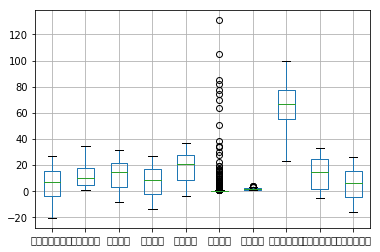

In [52]:
#  박스플랏을 이용하여  최종 데이터를 시각화하시오
import matplotlib.pyplot as plt

# 박스플랏 그리기
result2.boxplot()
plt.show()



In [90]:
# 한글이 표시 안될 때 해결 방법

import matplotlib
import matplotlib.font_manager

print([f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]) #여기서 나오는 폰트를 family로 지정
matplotlib.rc('font',family='NanumBarunGothic')

[]


C:\Users\carpe\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


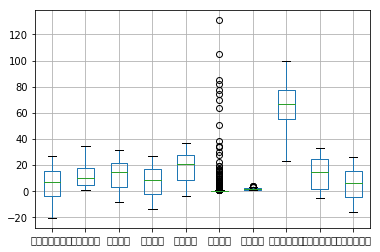

In [91]:
#  박스플랏을 이용하여  최종 데이터를 시각화하시오

import matplotlib.pyplot as plt

# 박스플랏 그리기 ( 한글 되나 확인해보세요~)
result2.boxplot()
plt.show()

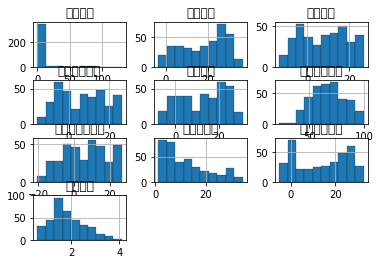

In [81]:
# 히스토그램을 이용하여 변수들 값들을 확인해보시오
result2.hist(edgecolor='black', linewidth=0.2)
plt.show()

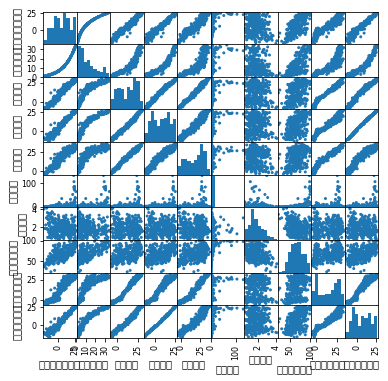

In [85]:
# scatter_matrix를 이용하여 변수들 간의 상관관계를 파악해 보시오.

from pandas.plotting import scatter_matrix

scatter_matrix(result2, alpha=1, figsize=(6, 6))
plt.show()

C:\Users\carpe\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


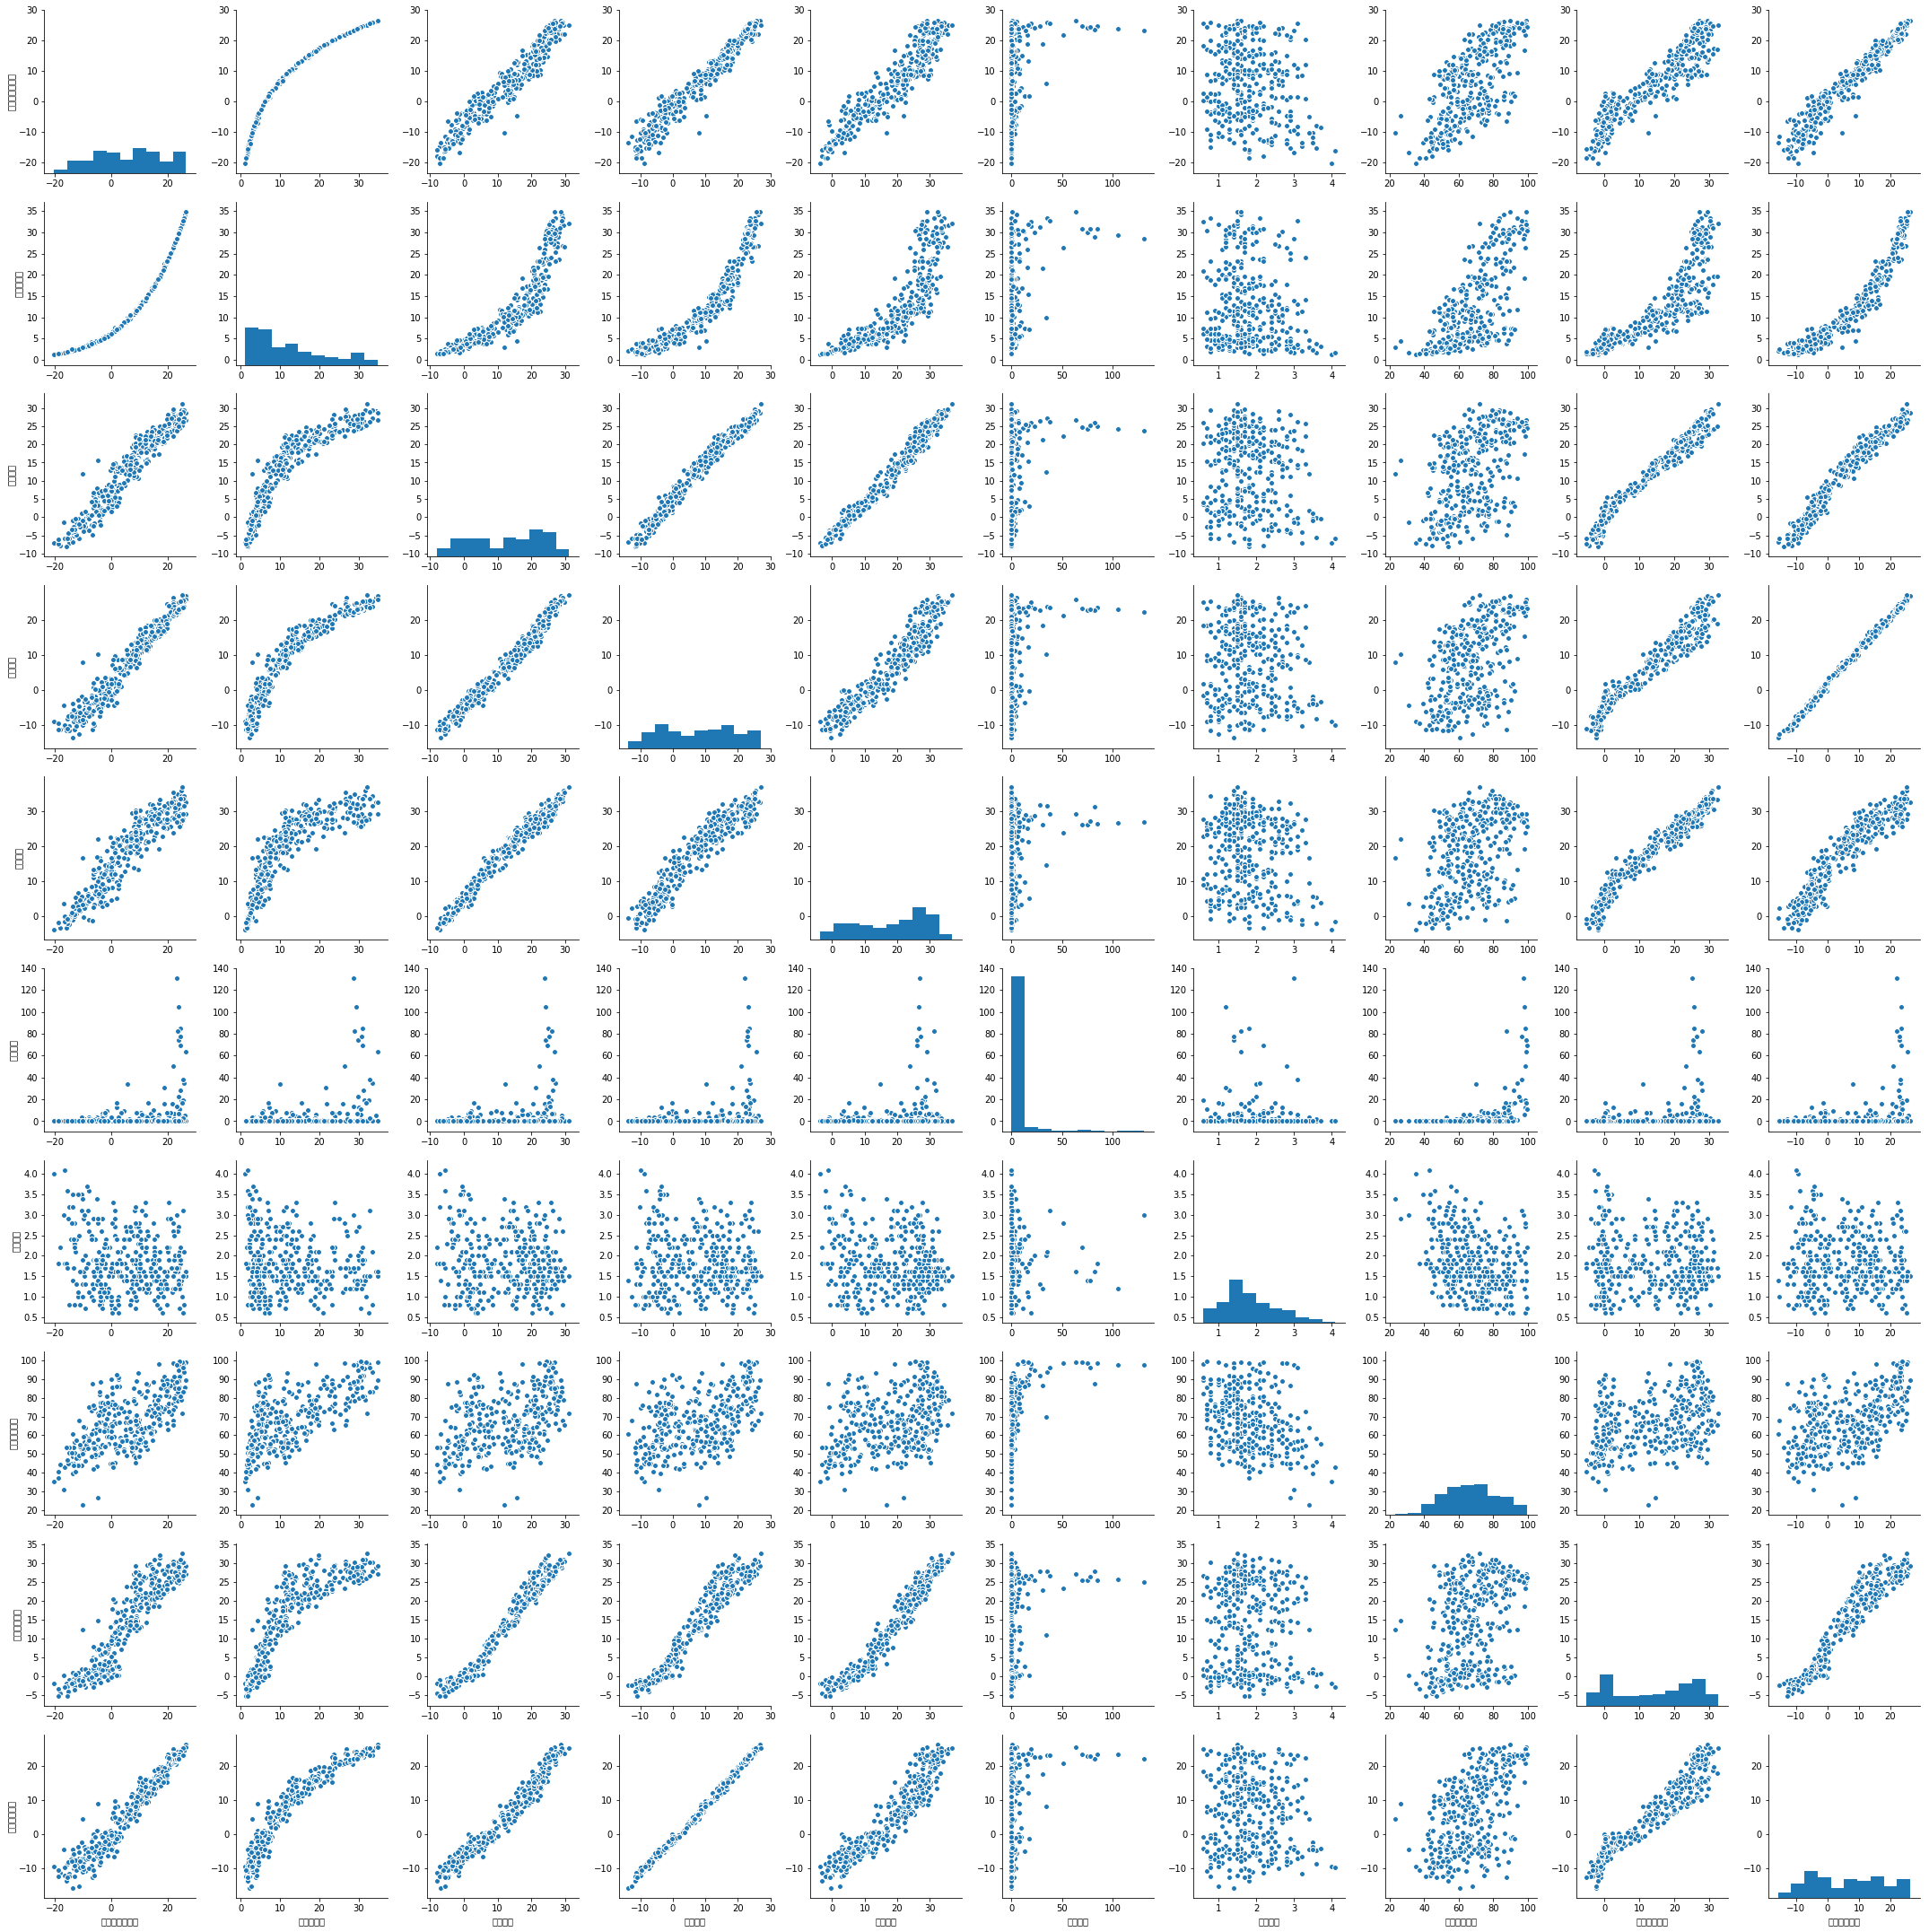

In [93]:
# scatter_matrix을 사용할 수 있는 seaborn 모듈을 사용하여 새롭게 상관관계를 파악해 보시오
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

import seaborn as sns

sns.pairplot(result2, size=3)
plt.show()
